<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95661 entries, 0 to 95660
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId_76871   95661 non-null  object 
 1   BatchId_36123         95661 non-null  object 
 2   AccountId_3957        95661 non-null  object 
 3   SubscriptionId_887    95661 non-null  object 
 4   CustomerId_4406       95661 non-null  object 
 5   UGX                   95661 non-null  object 
 6   256                   95661 non-null  int64  
 7   ProviderId_6          95661 non-null  object 
 8   ProductId_10          95661 non-null  object 
 9   airtime               95661 non-null  object 
 10  ChannelId_3           95661 non-null  object 
 11  1000                  95661 non-null  float64
 12  1000.1                95661 non-null  int64  
 13  2018-11-15T02:18:49Z  95661 non-null  object 
 14  2                     95661 non-null  int64  
 15  0                  

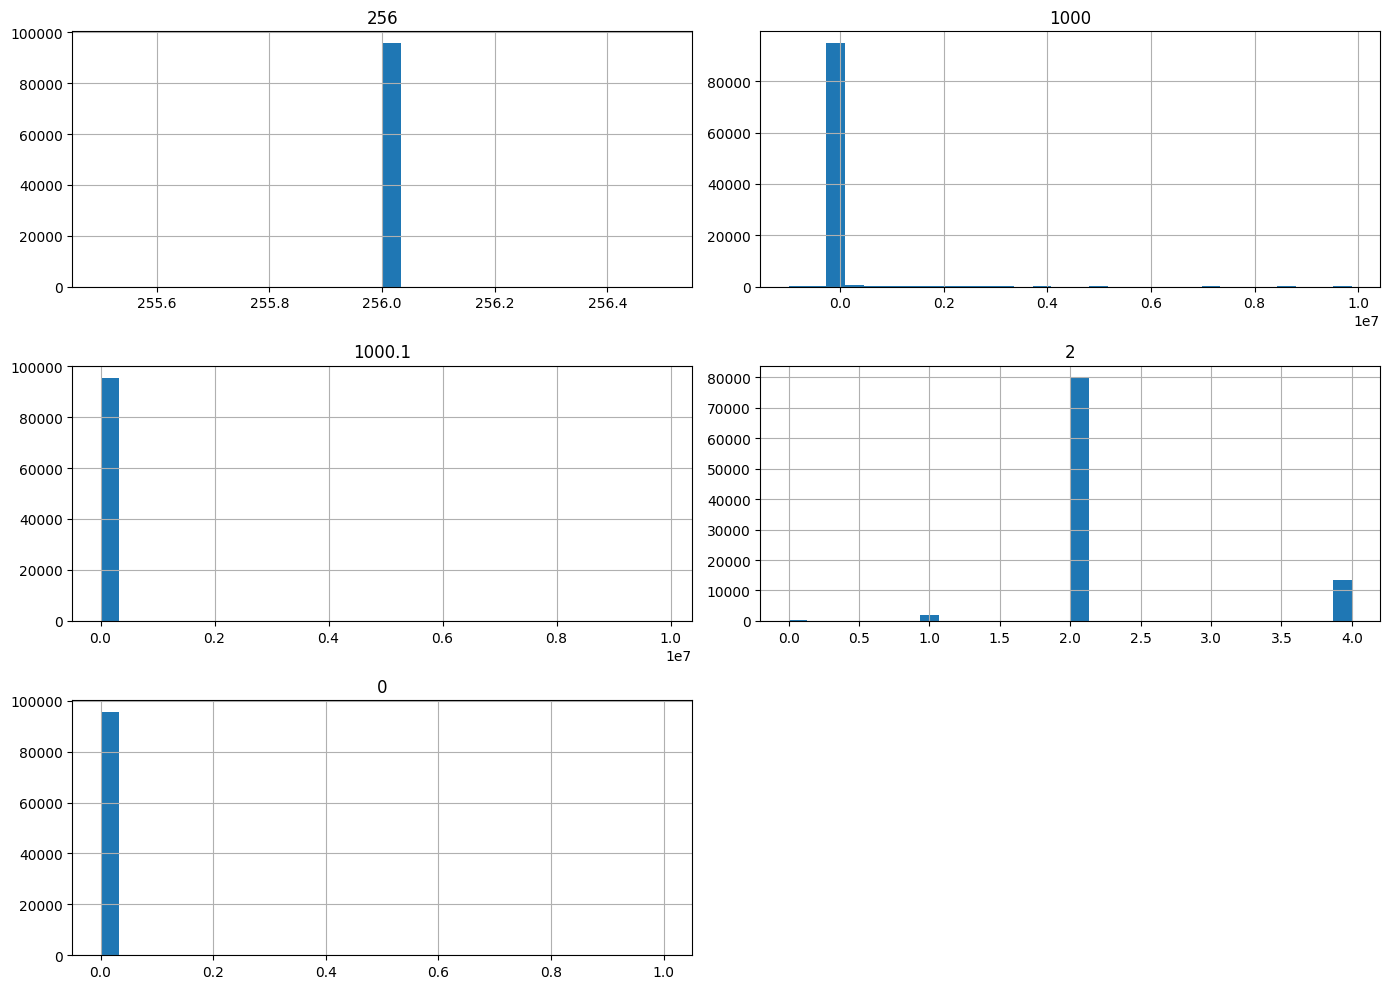

TransactionId_76871:
TransactionId_76871
TransactionId_35670    0.00001
TransactionId_73770    0.00001
TransactionId_26203    0.00001
TransactionId_380      0.00001
TransactionId_28195    0.00001
Name: proportion, dtype: float64

BatchId_36123:
BatchId_36123
BatchId_67019     0.000293
BatchId_51870     0.000167
BatchId_113893    0.000146
BatchId_127204    0.000125
BatchId_116835    0.000105
Name: proportion, dtype: float64

AccountId_3957:
AccountId_3957
AccountId_4841    0.322942
AccountId_4249    0.046592
AccountId_4840    0.018168
AccountId_3206    0.011551
AccountId_318     0.011185
Name: proportion, dtype: float64

SubscriptionId_887:
SubscriptionId_887
SubscriptionId_3829    0.341100
SubscriptionId_4429    0.046592
SubscriptionId_1372    0.011551
SubscriptionId_3087    0.011185
SubscriptionId_4346    0.010088
Name: proportion, dtype: float64

CustomerId_4406:
CustomerId_4406
CustomerId_7343    0.042766
CustomerId_3634    0.021796
CustomerId_647     0.019538
CustomerId_1096    0.0

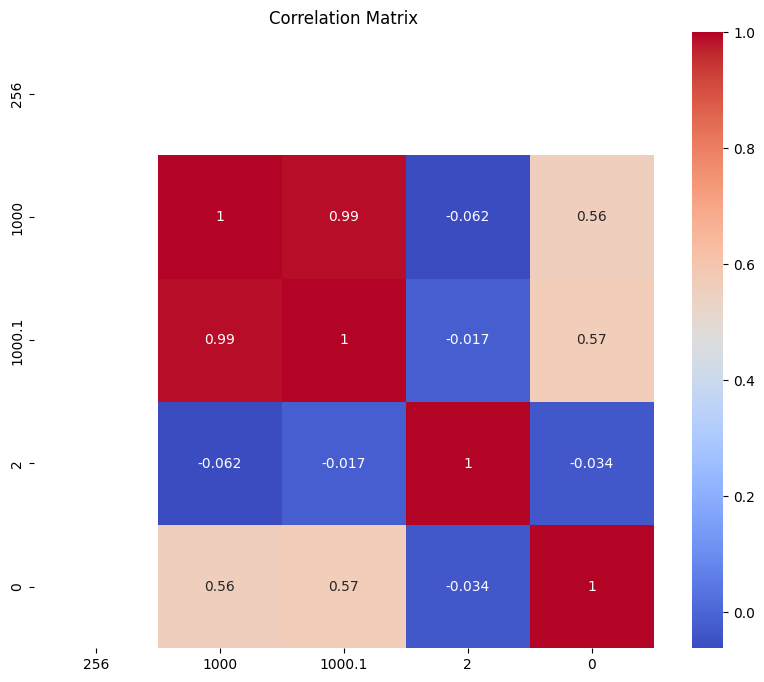

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

# Load data
df = pd.read_csv("../data/raw/data.csv", encoding="utf-8-sig", header=1)
df.head()

df.info()
df.describe(include='all')





df.describe()


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

df[numerical_cols].hist(bins=30, figsize=(14, 10))
plt.tight_layout()
plt.show()



categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    print(f"{col}:\n{df[col].value_counts(normalize=True).head()}\n")



plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


if 'FraudResult' in df.columns:
    sns.countplot(x='FraudResult', data=df)
    plt.title("FraudResult Distribution")
    plt.show()

